In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sys import platform
import os

In [47]:
if platform == 'linux':
    home = '/home/krista/'
elif platform == 'darwin': 
    home = '/Users/67981492/'
    
fig_path = home +  'Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/figures/new_figures/'

In [62]:
obs_ls_df = pd.read_csv(home + 'Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/aggregated_data/combined_learning_sig_obs_data.csv')
obs_ls_df.rename(columns=lambda x: x.strip(), inplace=True)

filtered_obs_ls_df = obs_ls_df.loc[(obs_ls_df.shifted_epoch_trial <= 7) & (obs_ls_df.shifted_epoch_trial > -2)]

In [63]:
lc = filtered_obs_ls_df.loc[(filtered_obs_ls_df.condition == 'lc')]
hc = filtered_obs_ls_df.loc[(filtered_obs_ls_df.condition == 'hc')]

lv = filtered_obs_ls_df.loc[(filtered_obs_ls_df.condition == 'lv')]
hv = filtered_obs_ls_df.loc[(filtered_obs_ls_df.condition == 'hv')]

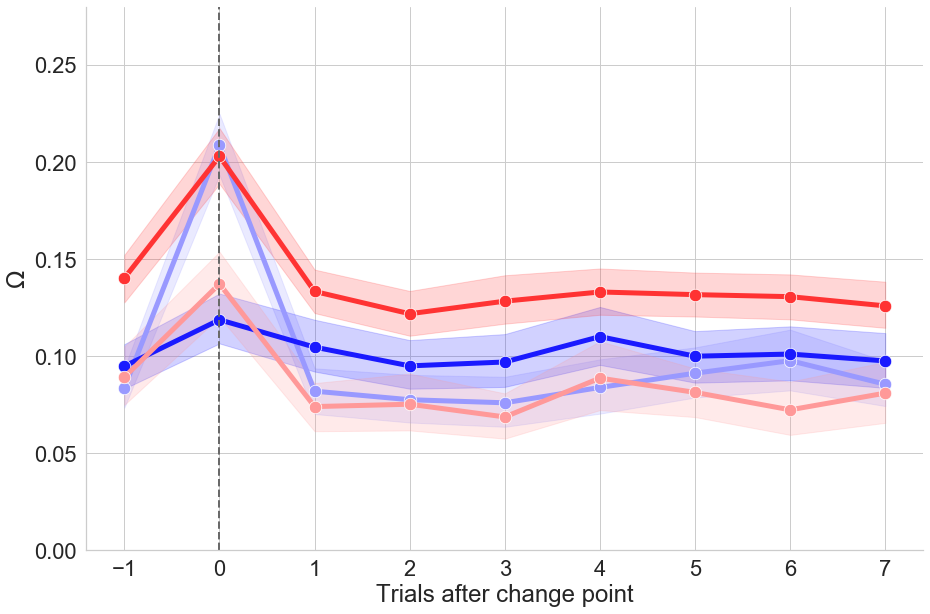

In [64]:
sns.set(font_scale=2, style='whitegrid')  


light_blue = (0.6,0.6,1)
dark_blue = (0.1,0.1,1)

light_red = (1, 0.6, 0.6)
dark_red = (1, 0.2, 0.2)

sns.lineplot("shifted_epoch_trial", "cpp", color=light_blue, 
             data=lc, linewidth=5, alpha=1,marker='.', markersize=25) 
sns.lineplot("shifted_epoch_trial", "cpp", color=dark_blue, data=hc, 
             linewidth=5, alpha=1,marker='.', markersize=25) 

sns.lineplot("shifted_epoch_trial", "cpp", color=light_red, data=lv,
             linewidth=5, alpha=1,marker='.', markersize=25) 
sns.lineplot("shifted_epoch_trial", "cpp", color=dark_red, data=hv,
            linewidth=5, alpha=1,marker='.', markersize=25) 
plt.ylabel(r'$\Omega$')  
plt.ylim(0, 0.28)
plt.axvline(0, linestyle='--', linewidth=2, color='dimgrey')
plt.xlabel('Trials after change point')

sns.despine()

plt.savefig(os.path.join(fig_path, 'conditional_cpp.png'), dpi=600, 
                        bbox_inches='tight', transparent=0)

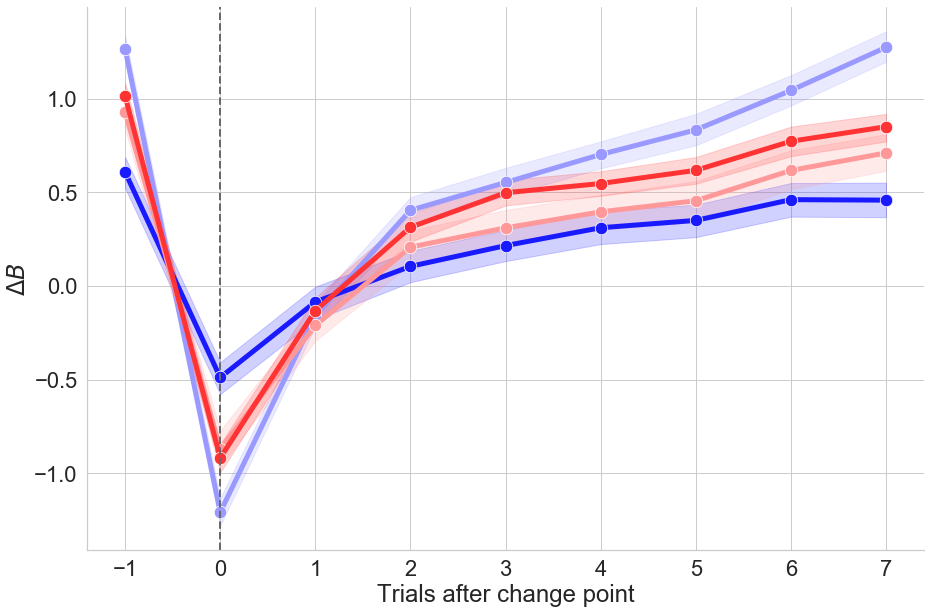

In [65]:
sns.lineplot("shifted_epoch_trial", "ideal_B", color=light_blue, 
             data=lc, linewidth=5, alpha=1, marker='.', markersize=25) 
sns.lineplot("shifted_epoch_trial", "ideal_B", color=dark_blue, data=hc, 
             linewidth=5, alpha=1, marker='.', markersize=25) 

sns.lineplot("shifted_epoch_trial", "ideal_B", color=light_red, data=lv,
             linewidth=5, alpha=1,marker='.', markersize=25) 
sns.lineplot("shifted_epoch_trial", "ideal_B", color=dark_red, data=hv,
            linewidth=5, alpha=1,marker='.', markersize=25) 
plt.ylabel(r'$\Delta B$')  
plt.axvline(0, linestyle='--', linewidth=2, color='dimgrey')
plt.xlabel('Trials after change point')

sns.despine()


plt.savefig(os.path.join(fig_path, 'conditional_B.png'), dpi=600, 
                        bbox_inches='tight', transparent=0)

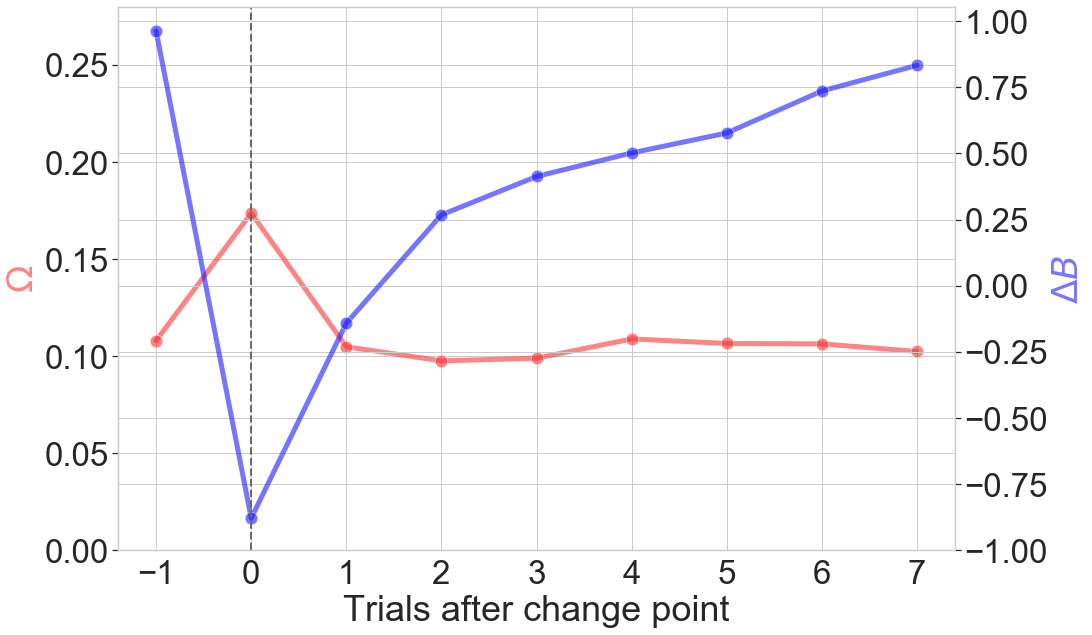

In [78]:
sns.set(font_scale=3, style='whitegrid')  


b_color = dark_blue # conflict 
cpp_color = dark_red # cpp 

fig, ax1 = plt.subplots()


sns.lineplot(x="shifted_epoch_trial", y="cpp", color=cpp_color, 
             data=filtered_obs_ls_df, linewidth=5, alpha=.6, ci=None, 
            marker='.', markersize=25)
ax2 = plt.twinx()
sns.lineplot(x="shifted_epoch_trial", y="ideal_B", 
             data=filtered_obs_ls_df, color=b_color, ax=ax2, 
             linewidth=5, alpha=.6, ci=None, marker='.', markersize=25)
ax2.set_ylabel(r'$\Delta B$', color=b_color, alpha=0.6)  
ax1.set_ylabel(r'$\Omega$', color=cpp_color, alpha=0.6)  
# ax1.tick_params(axis='y', labelcolor=cpp_color)
# ax2.tick_params(axis='y', labelcolor=b_color)


ax1.set_xlabel('Trials after change point')

ax1.set_xticks(range(-1, 8, 1))
ax1.set_ylim((0,0.28))
ax2.set_yticks(np.arange(-1, 1.25, 0.25))

plt.axvline(0, linestyle='--', linewidth=2, color='dimgrey')


plt.savefig(os.path.join(fig_path, 'B_cpp.png'), dpi=600, 
                        bbox_inches='tight', transparent=0)